This notebook computes phase diagram for a three component system comprising `PM6` as a polymer `Y6` as a small molecule.

While the solvent/co-solvent parameters are extracted from the document `expts/data/fourcompexp/solvents.pdf`.

Following formula would be used to compute $\chi$ parameters: (from the slides shared by Dr.Wodo on 06/16/2020 Material system for inspection)
$$  \chi_{ij} =  \frac{V_0}{RT}(\delta_i - \delta_j)^2$$. Approporiate conversion of units is necessary.

Here $ v_0 $ is a molar volume (solvent most likely)
 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import pdb

from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

import sys
if '../' not in sys.path:
    sys.path.insert(0,'../')
    
from parallel.parphase import compute
from solvers.visuals import plot_3d_phasediagram

Number of cores available: 12


In [3]:
from numpy.linalg import norm
from scipy.constants import gas_constant

def compute_chi(delta_i,delta_j,V):
    """
    total solubility parameters delta_i, delta_j are computed from hydrogen, polar, dispersive components
    
    delta_i, delta_j in MPa^{1/2} and V in cm3/mol
    
    returns a scalar chi value
    
    """
    constant = 1.0 #4.184*(2.045**2)/(8.314)
    
    chi_ij =  0.34+(constant)*(V/(gas_constant*300)*(delta_i - delta_j)**2)
        
    return chi_ij

def compute_weighted_chi(vec1,vec2,V, W):
    value = 0.0
    for i,w  in enumerate(W):
        value += w*(vec1[i]-vec2[i])**2
    
    value = 0.34 + value*(V/(gas_constant*300))
    
    return value
                   
from itertools import combinations
def get_chi_vector(deltas, V0, approach=1):
    """
    Given a list of deltas, computes binary interactions of chis
    """
    combs = combinations(deltas,2)
    inds = list((i,j) for ((i,_),(j,_)) in combinations(enumerate(deltas), 2))
      
    if approach==1:
        chi = [compute_chi(i[0],i[1],V0) for i in combs]
    elif approach==2:
        chi = [compute_weighted_chi(i[0],i[1],V0, W = [1.0,1.0,1.0]) for i in combs] 
    elif approach==3:
        chi = [compute_weighted_chi(i[0],i[1],V0, W = [1.0,0.25,0.25]) for i in combs]            
    else:
        raise KeyError
        
    return chi, inds
                   

In [4]:
data_array = np.array([['Solvent', 'd', 'p', 'hb', 'T', 'VM'],
['Chlorobenzene', 19.0, 4.3, 2.0 ,19.58 ,81.48],
['o-Dichlorobenzene', 19.2, 6.5 ,3.3 ,20.47 ,92.86],
['Chloroform', 17.8, 3.1 ,5.7, 18.95, 63.05],
['o-Xylene', 18.0, 1.4, 2.9, 18.10, 94.00],
['Toluene', 18.0 ,1.4 ,2.0, 18.29, 81.42],
['Acetone', 15.5 ,10.4 ,7, 18.29, 81.42]])

df = pd.DataFrame(data=data_array[1:,1:],index=data_array[1:,0],columns=data_array[0,1:])
df['delta'] = df.apply(lambda x: norm([x['d'],x['p'],x['hb']]), axis=1)
df.head()

,d,p,hb,T,VM,delta
Chlorobenzene,19.0,4.3,2.0,19.58,81.48,19.582901
o-Dichlorobenzene,19.2,6.5,3.3,20.47,92.86,20.537283
Chloroform,17.8,3.1,5.7,18.95,63.05,18.945712
o-Xylene,18.0,1.4,2.9,18.1,94.0,18.285787
Toluene,18.0,1.4,2.0,18.29,81.42,18.164801


In [5]:
delta_solvent = df.loc[solvent,['d','p','hb']].astype('float').to_list()
V0 = float(df.loc[solvent,'VM'])
get_chi_vector([delta_vec_polymer,delta_vec_sm,delta_solvent], V0, approach=2)

NameError: name 'solvent' is not defined

2020-07-22 16:56:46,027	INFO resource_spec.py:212 -- Starting Ray with 26.51 GiB memory available for workers and up to 13.27 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


{'M': [946, 12, 1],
 'chi': [0.34293993744671863, 0.3419273168981136, 0.340106501832694]}


2020-07-22 16:56:46,419	INFO services.py:1170 -- View the Ray dashboard at localhost:8265


3-dimensional grid generated at 0.33s
Making energy manifold a paraboloid with 2x padding of 0.05 maximum energy
Energy computed at 85.53s
Convexhull is computed at 85.58s
Using 5.02E-02 as a threshold for Laplacian of a simplex
Simplices are labelled at 88.17s
Labels are lifted at 90.58s
Total 0/2800 coplanar simplices
Computation took 90.72s


2020-07-22 16:58:20,898	INFO resource_spec.py:212 -- Starting Ray with 26.51 GiB memory available for workers and up to 13.26 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


{'M': [946, 12, 1],
 'chi': [0.4564280560843818, 0.5097519881735308, 0.4500973907824478]}


2020-07-22 16:58:21,256	INFO services.py:1170 -- View the Ray dashboard at localhost:8265


3-dimensional grid generated at 0.34s
Making energy manifold a paraboloid with 2x padding of 0.08 maximum energy
Energy computed at 86.31s
Convexhull is computed at 86.35s
Using 5.02E-02 as a threshold for Laplacian of a simplex
Simplices are labelled at 87.51s
Labels are lifted at 88.59s
Total 0/1003 coplanar simplices
Computation took 88.63s


2020-07-22 16:59:52,783	INFO resource_spec.py:212 -- Starting Ray with 26.51 GiB memory available for workers and up to 13.27 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


{'M': [946, 12, 1],
 'chi': [0.432612112818089, 0.3921618401484044, 0.3910536470608497]}


2020-07-22 16:59:53,140	INFO services.py:1170 -- View the Ray dashboard at localhost:8265


3-dimensional grid generated at 0.33s
Making energy manifold a paraboloid with 2x padding of 0.07 maximum energy
Energy computed at 85.35s
Convexhull is computed at 85.40s
Using 5.02E-02 as a threshold for Laplacian of a simplex
Simplices are labelled at 87.18s
Labels are lifted at 88.83s
Total 0/1651 coplanar simplices
Computation took 88.90s


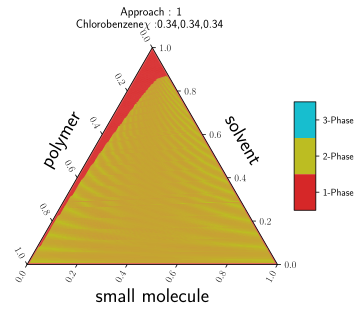

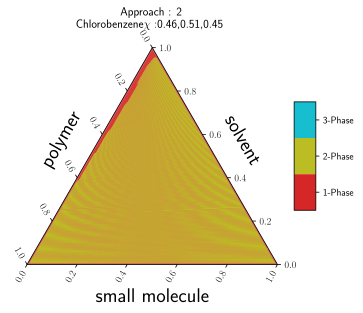

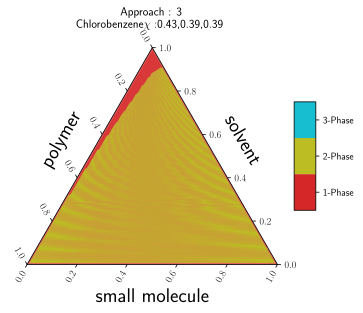

In [12]:
""" Collect material properties """
from solvers.visuals import plot_mpltern
import pprint
delta_polymer = 19.34 #(MPa^1/2)
delta_sm = 19.64  #(MPa^1/2)
M = [946,12,1] #(polymer, small molecule, solvent, co-solvent)   
delta_vec_polymer = [18.37,4.36,4.19]
delta_vec_sm = [19.98,3.72,3.44]

for solvent in df.index:
    V0 = float(df.loc[solvent,'VM'])
    for approach in range(1,4):
        if approach==1:
            delta_solvent = df.loc[solvent,'delta']
            chi = get_chi_vector([delta_polymer, delta_sm,delta_solvent],V0)[0]
        else:
            delta_solvent = df.loc[solvent,['d','p','hb']].astype('float').to_list()
            chi = get_chi_vector([delta_vec_polymer,delta_vec_sm,delta_solvent], V0, approach)[0]

        """ configure your material system """
        dimensions = len(M)
        configuration = {'M': M, 'chi':chi}
        pprint.pprint(configuration)
        dx = 200
        out = compute(3, configuration, dx, True, thresh=10,\
                                             flag_lift_label=True, use_weighted_delaunay= False,\
                                             flag_remove_collinear = False, beta=0.0, flag_make_energy_paraboloid=True)
        grid = out['grid']
        num_comps = out['num_comps']
        simplices = out['simplices']
        output = out['output']

        """ Post-processing """
        ax, cbar = plot_mpltern(grid, simplices, num_comps)
        title = 'Approach : {} \n'.format(approach) + solvent + r'$\chi: $'+ ','.join('{:.2f}'.format(k) for k in chi )
        ax.set_title(title,pad=20)
#         fname = '../figures/PM6Y6/'+solvent + '.png'
#         plt.savefig(fname,dpi=500, bbox_inches='tight')
#         #plt.close()
    break

In [ ]:
from solvers.helpers import get_ternary_coords
def plot_tie_triangles(grid, simplices, num_comps, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = plt.gcf()
    ax.set_aspect('equal')
    
    coords = np.asarray([get_ternary_coords(pt) for pt in grid.T])
    criteria = np.array(num_comps)==3
    tp = ax.triplot(coords[:,0], coords[:,1], np.asarray(simplices)[criteria], linewidth=0.5)

    words = [r'$\varphi_{1}$',r'$\varphi_{2}$',r'$\varphi_{3}$']
    xs = [-0.15,1,0.5]
    ys = [0,0,np.sqrt(3)/2+0.01]
    for x, y, s in zip(xs,ys,words):
        ax.text(x,y,s,fontsize=20)

    plt.axis('off')
    cbar = []
    return ax, cbar  

ax, cbar = plot_tie_triangles(grid, simplices, num_comps)

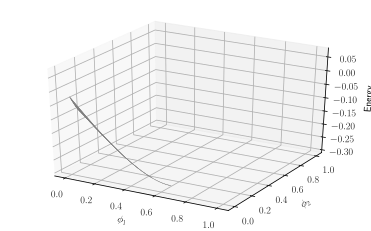

In [9]:
from solvers.utils import plot_energy_landscape     
plt.close('all')
plot_energy_landscape(out)

In [13]:
from solvers.utils import plot_triangulated_surface
x, y, z = grid[0,:], grid[1,:], out['energy']
fig = plot_triangulated_surface(x,y, x,y,z)
dop_str = 'M:' + ','.join('{}'.format(m) for m in configuration['M'])
chi_str = r'$\chi$: ' + ','.join('{:.2f}'.format(c) for c in configuration['chi'])
config_str = dop_str+'\n'+chi_str
fig.update_layout(title=config_str,scene=dict(
    xaxis_title="Phi_1",
    yaxis_title="Phi_2",
    zaxis_title = "Energy"),
    coloraxis_colorbar=dict(title='Energy'),
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple")
)
fig.write_html('../figures/3dplots/PM6Y6.html')

In [15]:
import plotly.figure_factory as ff
fig = ff.create_trisurf(x=x, y=y, z=z,
                     simplices=simplices)
fig.update_layout(title=config_str,scene=dict(
    xaxis_title="Phi_1",
    yaxis_title="Phi_2",
    zaxis_title = "Energy"),
    coloraxis_colorbar=dict(title='Energy'),
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple")
)
fig.write_html('../figures/3dplots/PM6Y6_convexhull_energy.html')

# Version 2 

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
import pandas as pd
import pdb

from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
    
import polyphase

In [23]:
data_array = np.array([['Solvent', 'd', 'p', 'hb', 'T', 'VM'],
['Chlorobenzene', 19.0, 4.3, 2.0 ,19.58 ,81.48],
['o-Dichlorobenzene', 19.2, 6.5 ,3.3 ,20.47 ,92.86],
['Chloroform', 17.8, 3.1 ,5.7, 18.95, 63.05],
['o-Xylene', 18.0, 1.4, 2.9, 18.10, 94.00],
['Toluene', 18.0 ,1.4 ,2.0, 18.29, 81.42],
['Acetone', 15.5 ,10.4 ,7, 18.29, 81.42]])

PM6 = [18.37,4.36,4.19]
Y6 = [19.98,3.72,3.44]

In [24]:
def get_system(i):
    delta_solvent = data_array[i,1:4].astype(np.float64)
    delta_sm = Y6
    delta_polymer = PM6
    chi = polyphase.get_chi_vector([delta_polymer,delta_sm,delta_solvent], data_array[i,5].astype(np.float64), 2)[0]
    out = [
        data_array[i,0],'Y6', 'PM6',
        chi[0], chi[1], chi[2],
        delta_solvent, delta_sm, delta_polymer
    ]   
    
    return out

pennstate_df = pd.DataFrame(get_system(i) for i in range(1, len(data_array)))
pennstate_df.columns =['solvent', 'SM','polymer','chi12','chi13','chi23','delta_solv','delta_SM','delta_polymer'] 
pennstate_df

,solvent,SM,polymer,chi12,chi13,chi23,delta_solv,delta_SM,delta_polymer
0,Chlorobenzene,Y6,PM6,0.456428,0.509752,0.450097,"[19.0, 4.3, 2.0]","[19.98, 3.72, 3.44]","[18.37, 4.36, 4.19]"
1,o-Dichlorobenzene,Y6,PM6,0.472689,0.565626,0.651095,"[19.2, 6.5, 3.3]","[19.98, 3.72, 3.44]","[18.37, 4.36, 4.19]"
2,Chloroform,Y6,PM6,0.430093,0.445977,0.598950,"[17.8, 3.1, 5.7]","[19.98, 3.72, 3.44]","[18.37, 4.36, 4.19]"
3,o-Xylene,Y6,PM6,0.474318,0.738055,0.701568,"[18.0, 1.4, 2.9]","[19.98, 3.72, 3.44]","[18.37, 4.36, 4.19]"
4,Toluene,Y6,PM6,0.456342,0.787018,0.711348,"[18.0, 1.4, 2.0]","[19.98, 3.72, 3.44]","[18.37, 4.36, 4.19]"
5,Acetone,Y6,PM6,0.456342,2.057441,2.865388,"[15.5, 10.4, 7.0]","[19.98, 3.72, 3.44]","[18.37, 4.36, 4.19]"


In [35]:
# these are copies from 'expts/scripts/hte.py'
def plain_phase_diagram(output, ax = None):
    """ 
    Plot phase diagrams as points without any labels or stuff
    """
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = plt.gcf()
    
    phase_colors =['w','r','g','b']
    df = output.transpose()
    for i, ds in df.groupby('label'):
        label_mat = ds.to_numpy()
        XY = np.asarray([polyphase.get_ternary_coords(p[:-1]) for p in label_mat])
        ax.scatter(XY[:,0],XY[:,1],c=phase_colors[int(i)])
    ax.set_ylim([0.4,0.9])
    ax.set_xlim([0.2,0.8])
    ax.axis('off')
    
    return ax 

def plot_phase_diagram(row):
    
    chi = [row['chi12'], row['chi13'], row['chi23']]
    fname = dirname +'{}_{}_{}'.format(row['solvent'], row['SM'], row['polymer'])
    print('Computing {}'.format(fname))
    
    M = [946,12,1]
    configuration = {'M': M, 'chi':chi}
    dx = 400
    kwargs = {
        'flag_refine_simplices':True,
        'flag_lift_label': True,
        'use_weighted_delaunay': False,
        'flag_remove_collinear' : False, 
        'beta':1e-4, # not used 
        'flag_make_energy_paraboloid': True, 
        'pad_energy': 2,
        'flag_lift_purecomp_energy': False,
        'threshold_type':'uniform',
        'thresh_scale':0.1*dx,
        'lift_grid_size':dx,
        'verbose' : False
     }

    out = polyphase.compute(configuration, dx, **kwargs)
    output = out['output']

    plain_phase_diagram(output)
    plt.savefig(fname,dpi=500, bbox_inches='tight')
    plt.close()
    
    del out, output, chi, M, configuration, dx, kwargs
    
    return fname

dirname = '../figures/pennstate/pds_v2/'
for _, row in pennstate_df.iterrows():
    plot_phase_diagram(row)


2020-11-03 23:00:52,363	INFO resource_spec.py:212 -- Starting Ray with 36.47 GiB memory available for workers and up to 18.26 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Computing ../figures/pennstate/pds_v2/Chlorobenzene_Y6_PM6


2020-11-03 23:00:52,645	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-11-03 23:00:52,877	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


Computation took 181.31s


2020-11-03 23:04:05,446	INFO resource_spec.py:212 -- Starting Ray with 36.57 GiB memory available for workers and up to 18.29 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Computing ../figures/pennstate/pds_v2/o-Dichlorobenzene_Y6_PM6


2020-11-03 23:04:05,721	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-11-03 23:04:05,949	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


Computation took 174.40s


2020-11-03 23:07:11,661	INFO resource_spec.py:212 -- Starting Ray with 36.52 GiB memory available for workers and up to 18.27 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Computing ../figures/pennstate/pds_v2/Chloroform_Y6_PM6


2020-11-03 23:07:11,937	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-11-03 23:07:12,163	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


Computation took 185.84s


2020-11-03 23:10:29,802	INFO resource_spec.py:212 -- Starting Ray with 36.43 GiB memory available for workers and up to 18.21 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Computing ../figures/pennstate/pds_v2/o-Xylene_Y6_PM6


2020-11-03 23:10:30,090	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-11-03 23:10:30,347	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


Computation took 169.96s


2020-11-03 23:13:31,604	INFO resource_spec.py:212 -- Starting Ray with 36.43 GiB memory available for workers and up to 18.23 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Computing ../figures/pennstate/pds_v2/Toluene_Y6_PM6


2020-11-03 23:13:31,886	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-11-03 23:13:32,129	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


Computation took 170.68s


2020-11-03 23:16:34,219	INFO resource_spec.py:212 -- Starting Ray with 36.52 GiB memory available for workers and up to 18.28 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Computing ../figures/pennstate/pds_v2/Acetone_Y6_PM6


2020-11-03 23:16:34,485	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-11-03 23:16:34,700	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


Computation took 168.24s


In [ ]:
files = []
for _, row in pennstate_df.iterrows():
    files.append(dirname+'{}_{}_{}.png'.format(row['solvent'], row['SM'], row['polymer']))

In [ ]:
from skimage.transform import resize
from skimage.io import imread, imread_collection
from skimage.metrics import structural_similarity as ssim
from polyphase.parallel import get_distance_matrix

def get_ssim_distance(file0, file1):
    """ Given two image file names in file0, file1 compute distance"""
    
    img0 = imread(file0)
    img1 = imread(file1)
    img0 = resize(img0, (64,64))
    img1 = resize(img1, (64,64))
    d = ssim(img0, img1, multichannel=True)
    
    return 1-d

M = get_distance_matrix(files, get_ssim_distance)

# create the affinity matrix
delta = 1/len(files)
X = np.exp(- M ** 2 / (2. * delta ** 2))

In [ ]:
embedding = np.array([[-0.04649014,  0.13761328],
       [-0.04612298,  0.10516858],
       [-0.0733839 ,  0.26849897],
       [-0.04271957, -0.25907289],
       [-0.04271932, -0.25912586],
       [ 0.8883083 ,  0.03435324]])

In [ ]:
fig, ax = plt.subplots(dpi=250)
ax.scatter(embedding[:,0], embedding[:,1],s=50)
for i, row in pennstate_df.iterrows():
    ax.annotate(row['solvent'], (embedding[i,0], embedding[i,1]))
    
ax.set_xlabel('Eigen vector 1')
ax.set_ylabel('Eigen vector 2')
plt.savefig(dirname+'clustering.png', dpi=500, bbox_inches='tight')
plt.show()